# 支持向量机

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 用 Seaborn 画图
import seaborn as sns; sns.set()

## 支持向量机的原理

* 生成分类方法和判别分类方法的区别
    * 生成法：假设每个类的分布
    * 判别法：用一条分割线（二维空间中的直线或者曲线）或者流体形（多维空间中的曲线、曲面等概念的推广）将各种类型分割开

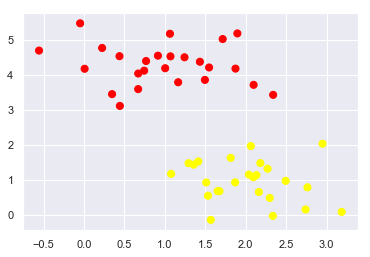

In [2]:
from sklearn.datasets.samples_generator import make_blobs

X,y = make_blobs(n_samples=50, centers=2,
                random_state=0, cluster_std=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

对于上图，生成方法会假设数据的分布，从而求出特征属于类别的概率，判别方法则是找到一条线，划分两个数据

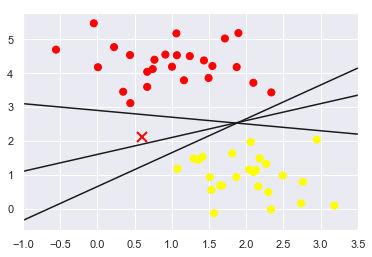

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10) # 标了一个难以划分的点

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

画一条有宽度的线条

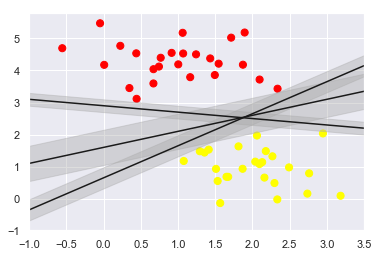

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)
# 边界并不是机器算出来的，指定了的
plt.xlim(-1, 3.5);

用支持向量机拟合：

In [6]:
from sklearn.svm import SVC # classifier
model = SVC(kernel='linear', C=1e10)  # 线性核，软间隔系数设置很大，条件要求就比较高
model.fit(X,y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)